# **LEZIONE 6**

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
import warnings
warnings.filterwarnings('ignore')

## EQUILIBRAZIONE
Ho deciso di mostrare l'equilibrazione del sistema per la temperatura iniziale da cui partire per ottenere i grafici richiesti
$$ T= 0.5$$

Nei seguenti plot mostro l'andamento di: Magnetizzazione, Suscettibilità, Calore Specifico, Energia Totale, a temperatura fissata. 
Faccio evolvere il sistema per 100 Blocchi da 10000 passi ciascuno, in questo modo voglio andare a vedere se  i valori delle quantità di interesse si stabilizzano oppure no.

Successivamente, quando andrò a mostrare l'evoluzione di queste grandezzze al variare della temperatura


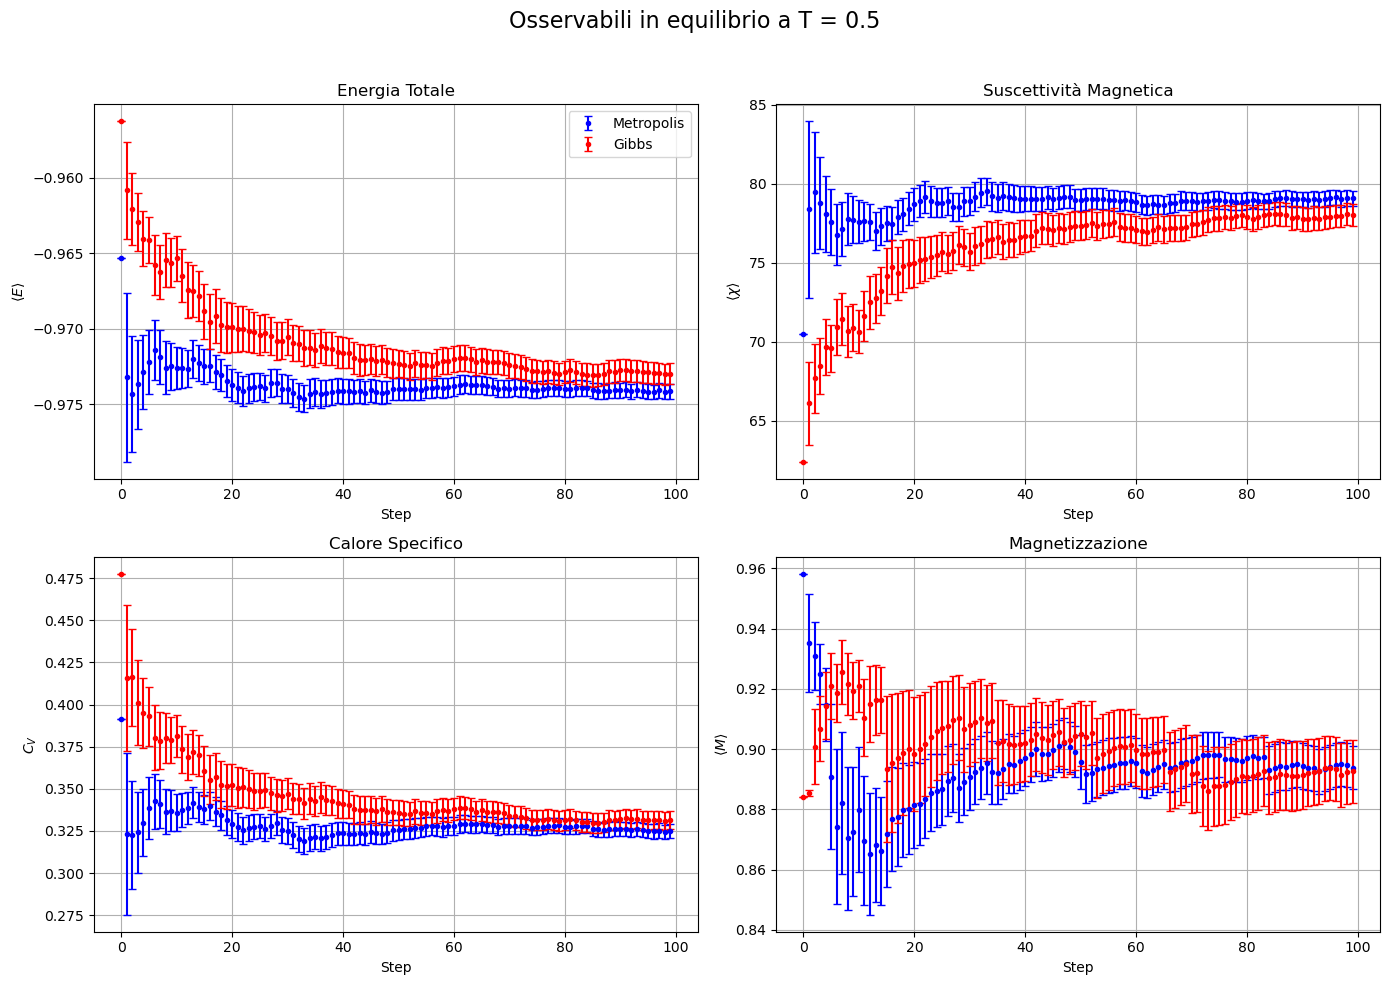

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file
tot_en_eq = pd.read_csv('OUTPUT/EQUILIBRATION/temp_metro/total_energy.dat', delim_whitespace=True)
susc_eq = pd.read_csv('OUTPUT/EQUILIBRATION/temp_metro/susceptibility.dat', delim_whitespace=True)
cv_eq = pd.read_csv('OUTPUT/EQUILIBRATION/temp_metro/specific_heat.dat', delim_whitespace=True)
magn_eq = pd.read_csv('OUTPUT/EQUILIBRATION/temp_metro/magnetization.dat', delim_whitespace=True)
tot_en_eq_gibbs = pd.read_csv('OUTPUT/EQUILIBRATION/temp_gibbs/total_energy.dat', delim_whitespace=True)
susc_eq_gibbs = pd.read_csv('OUTPUT/EQUILIBRATION/temp_gibbs/susceptibility.dat', delim_whitespace=True)
cv_eq_gibbs = pd.read_csv('OUTPUT/EQUILIBRATION/temp_gibbs/specific_heat.dat', delim_whitespace=True)
magn_eq_gibbs = pd.read_csv('OUTPUT/EQUILIBRATION/temp_gibbs/magnetization.dat', delim_whitespace=True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Osservabili in equilibrio a T = 0.5', fontsize=16)

# Plot 1: Energia Totale
x = range(len(tot_en_eq))
axs[0, 0].errorbar(x, tot_en_eq['TE_AVE:'], yerr=tot_en_eq['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='blue', ecolor='blue', label='Metropolis')
axs[0, 0].errorbar(x, tot_en_eq_gibbs['TE_AVE:'], yerr=tot_en_eq_gibbs['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='red', ecolor='red', label='Gibbs')
axs[0, 0].set_title('Energia Totale')
axs[0, 0].set_xlabel('Step')
axs[0, 0].set_ylabel(r'$\langle E \rangle$')
axs[0,0].legend()
axs[0, 0].grid(True)

# Plot 2: Suscettività
x = range(len(susc_eq))
axs[0, 1].errorbar(x, susc_eq['X_AVE:'], yerr=susc_eq['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='blue', ecolor='blue', label='Metropolis')
axs[0, 1].errorbar(x, susc_eq_gibbs['X_AVE:'], yerr=susc_eq_gibbs['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='red', ecolor='red', label='Gibbs')
axs[0, 1].set_title('Suscettività Magnetica')
axs[0, 1].set_xlabel('Step')
axs[0, 1].set_ylabel(r'$\langle \chi \rangle$')

axs[0, 1].grid(True)

# Plot 3: Calore Specifico
x = range(len(cv_eq))
axs[1, 0].errorbar(x, cv_eq['CV_AVE:'], yerr=cv_eq['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='blue', ecolor='blue', label='Metropolis')
axs[1, 0].errorbar(x, cv_eq_gibbs['CV_AVE:'], yerr=cv_eq_gibbs['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='red', ecolor='red', label='Gibbs')
axs[1, 0].set_title('Calore Specifico')
axs[1, 0].set_xlabel('Step')
axs[1, 0].set_ylabel(r'$C_V$')
axs[1, 0].grid(True)

# Plot 4: Magnetizzazione
x = range(len(magn_eq))
axs[1, 1].errorbar(x, magn_eq['M_AVE:'], yerr=magn_eq['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='blue', ecolor='blue', label='Metropolis')
axs[1, 1].errorbar(x, magn_eq_gibbs['M_AVE:'], yerr=magn_eq_gibbs['ERROR:'],
                   fmt='o', markersize=3, capsize=3, color='red', ecolor='red', label='Gibbs')
axs[1, 1].set_title('Magnetizzazione')
axs[1, 1].set_xlabel('Step')
axs[1, 1].set_ylabel(r'$\langle M \rangle$')
axs[1, 1].grid(True)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Come si può notare il sistema si è stabilizzato a dei valori che non registrano più delle grosse fluttuazioni, questo vale sia utilizzando l'algoritmo di Metropolis che con l'algoritmo di Gibbs. a questo punto ho impostato il parametro 
`RESTART = 1`
In modo da ripartire dalla configurazione di spin del sistema equilibrato.


Proseguendo con lo svolgimento dell’esercizio, ho deciso di calcolare le quantità richieste al variare della temperatura, utilizzando incrementi piccoli di $\Delta T = 0.1 $.  
Durante questa fase, ho osservato che il sistema non necessitava di una nuova fase di riequilibrazione ad ogni variazione di temperatura. Questo perché, grazie alla gradualità del cambiamento, il sistema risultava già sufficientemente vicino all’equilibrio, e le grandezze fisiche avevano modo di adattarsi rapidamente al nuovo stato termico, senza compromettere l’accuratezza delle stime ottenute.


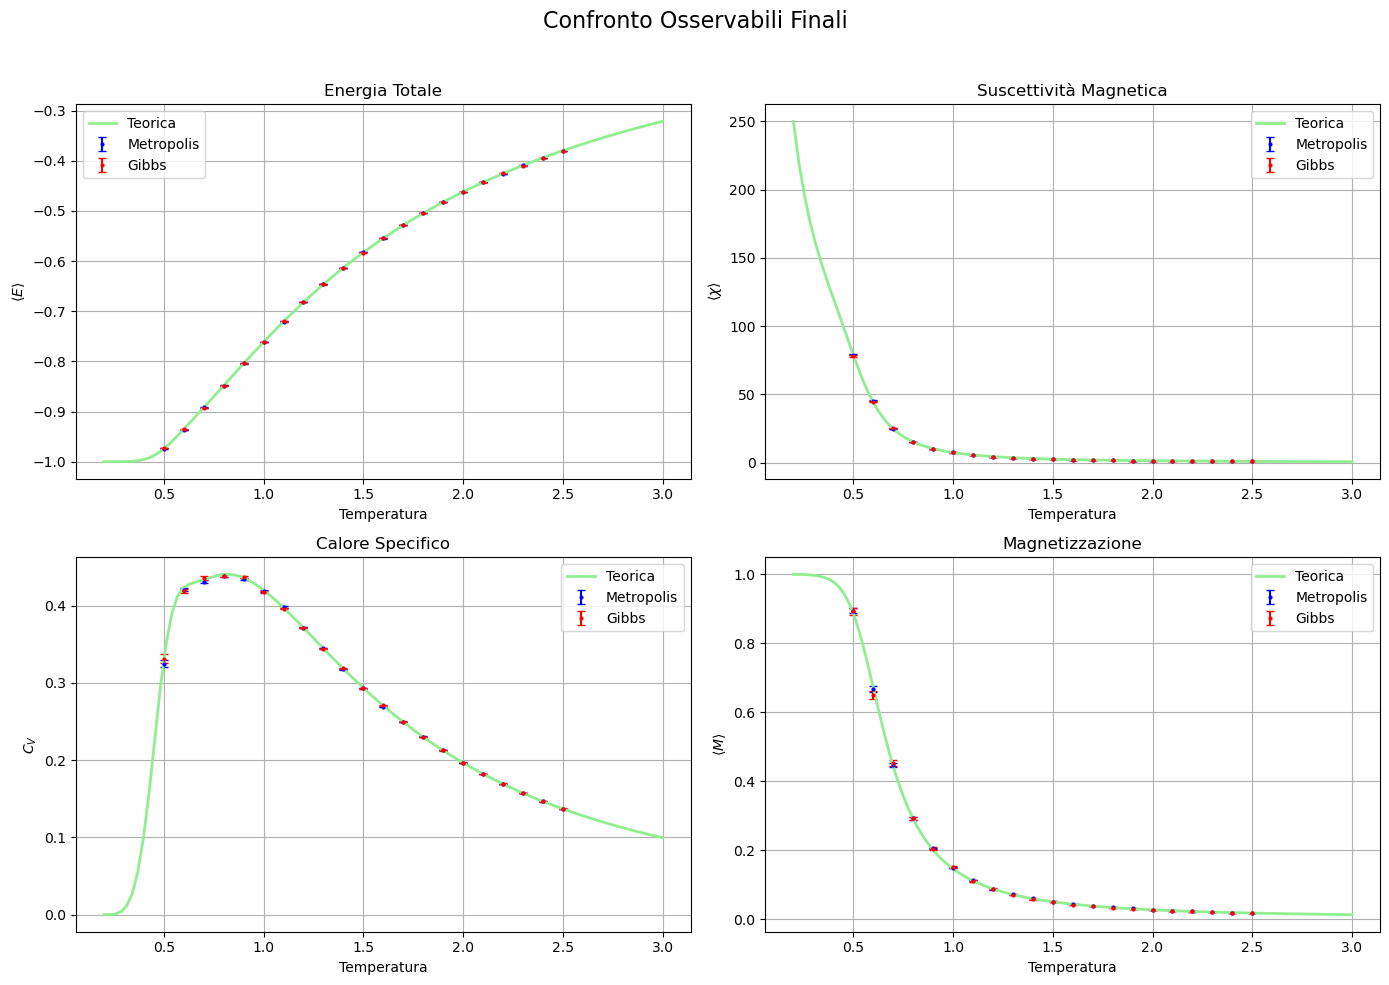

In [8]:
en_metro = pd.read_csv('OUTPUT/FINAL_METRO/total_energy.dat', delim_whitespace=True)
susc_metro = pd.read_csv('OUTPUT/FINAL_METRO/susceptibility.dat', delim_whitespace=True)
cv_metro = pd.read_csv('OUTPUT/FINAL_METRO/specific_heat.dat', delim_whitespace=True)
magn_metro = pd.read_csv('OUTPUT/FINAL_METRO/magnetization.dat', delim_whitespace=True)
en_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/total_energy.dat', delim_whitespace=True)
susc_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/susceptibility.dat', delim_whitespace=True)
cv_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/specific_heat.dat', delim_whitespace=True)
magn_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/magnetization.dat', delim_whitespace=True)

points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1/T
J = 1.0
Ns = 50
h = 0.02

# Energia teorica
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th
e_th = -J * (th + ch*thN) / (1 + thN)

# Calore specifico teorico
heat_th = ((beta*J)**2) * (
    ((1 + thN + (Ns-1)*(th**2) + (Ns-1)*(ch**2)*thN)/(1 + thN)) -
    Ns*((th + ch*thN)/(1 + thN))**2
)

# Magnetizzazione teorica
b = beta
l1 = np.exp(b*J)*np.cosh(b*h) + np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h) - np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_th = (np.exp(b*J)*np.sinh(b*h)*(
        (l1**(Ns-1))*(1 + np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))) +
        (l2**(Ns-1))*(1 - np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J)))
    )) / Z

# Suscettività teorica
X_th = beta * np.exp(2*beta*J) * (1 - thN)/(1 + thN)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Confronto Osservabili Finali', fontsize=16)

# 1. Energia Totale
axs[0, 0].errorbar(en_metro['TEMPERATURE:'], en_metro['TE_AVE:'], yerr=en_metro['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='blue', label='Metropolis')
axs[0, 0].errorbar(en_gibbs['TEMPERATURE:'], en_gibbs['TE_AVE:'], yerr=en_gibbs['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='red', label='Gibbs')
axs[0, 0].plot(T, e_th, color='lightgreen', linewidth=2, label='Teorica')
axs[0, 0].set_title('Energia Totale')
axs[0, 0].set_xlabel('Temperatura')
axs[0, 0].set_ylabel(r'$\langle E \rangle$')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Suscettività
axs[0, 1].errorbar(susc_metro['TEMPERATURE:'], susc_metro['X_AVE:'], yerr=susc_metro['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='blue', label='Metropolis')
axs[0, 1].errorbar(susc_gibbs['TEMPERATURE:'], susc_gibbs['X_AVE:'], yerr=susc_gibbs['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='red', label='Gibbs')
axs[0, 1].plot(T, X_th, color='lightgreen', linewidth=2, label='Teorica')
axs[0, 1].set_title('Suscettività Magnetica')
axs[0, 1].set_xlabel('Temperatura')
axs[0, 1].set_ylabel(r'$\langle \chi \rangle$')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Calore Specifico
axs[1, 0].errorbar(cv_metro['TEMPERATURE:'], cv_metro['CV_AVE:'], yerr=cv_metro['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='blue', label='Metropolis')
axs[1, 0].errorbar(cv_gibbs['TEMPERATURE:'], cv_gibbs['CV_AVE:'], yerr=cv_gibbs['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='red', label='Gibbs')
axs[1, 0].plot(T, heat_th, color='lightgreen', linewidth=2, label='Teorica')
axs[1, 0].set_title('Calore Specifico')
axs[1, 0].set_xlabel('Temperatura')
axs[1, 0].set_ylabel(r'$C_V$')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Magnetizzazione
axs[1, 1].errorbar(magn_metro['TEMPERATURE:'], magn_metro['M_AVE:'], yerr=magn_metro['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='blue', label='Metropolis')
axs[1, 1].errorbar(magn_gibbs['TEMPERATURE:'], magn_gibbs['M_AVE:'], yerr=magn_gibbs['ERROR:'],
                   fmt='o', markersize=2, capsize=3, color='red', label='Gibbs')
axs[1, 1].plot(T, M_th, color='lightgreen', linewidth=2, label='Teorica')
axs[1, 1].set_title('Magnetizzazione')
axs[1, 1].set_xlabel('Temperatura')
axs[1, 1].set_ylabel(r'$\langle M \rangle$')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

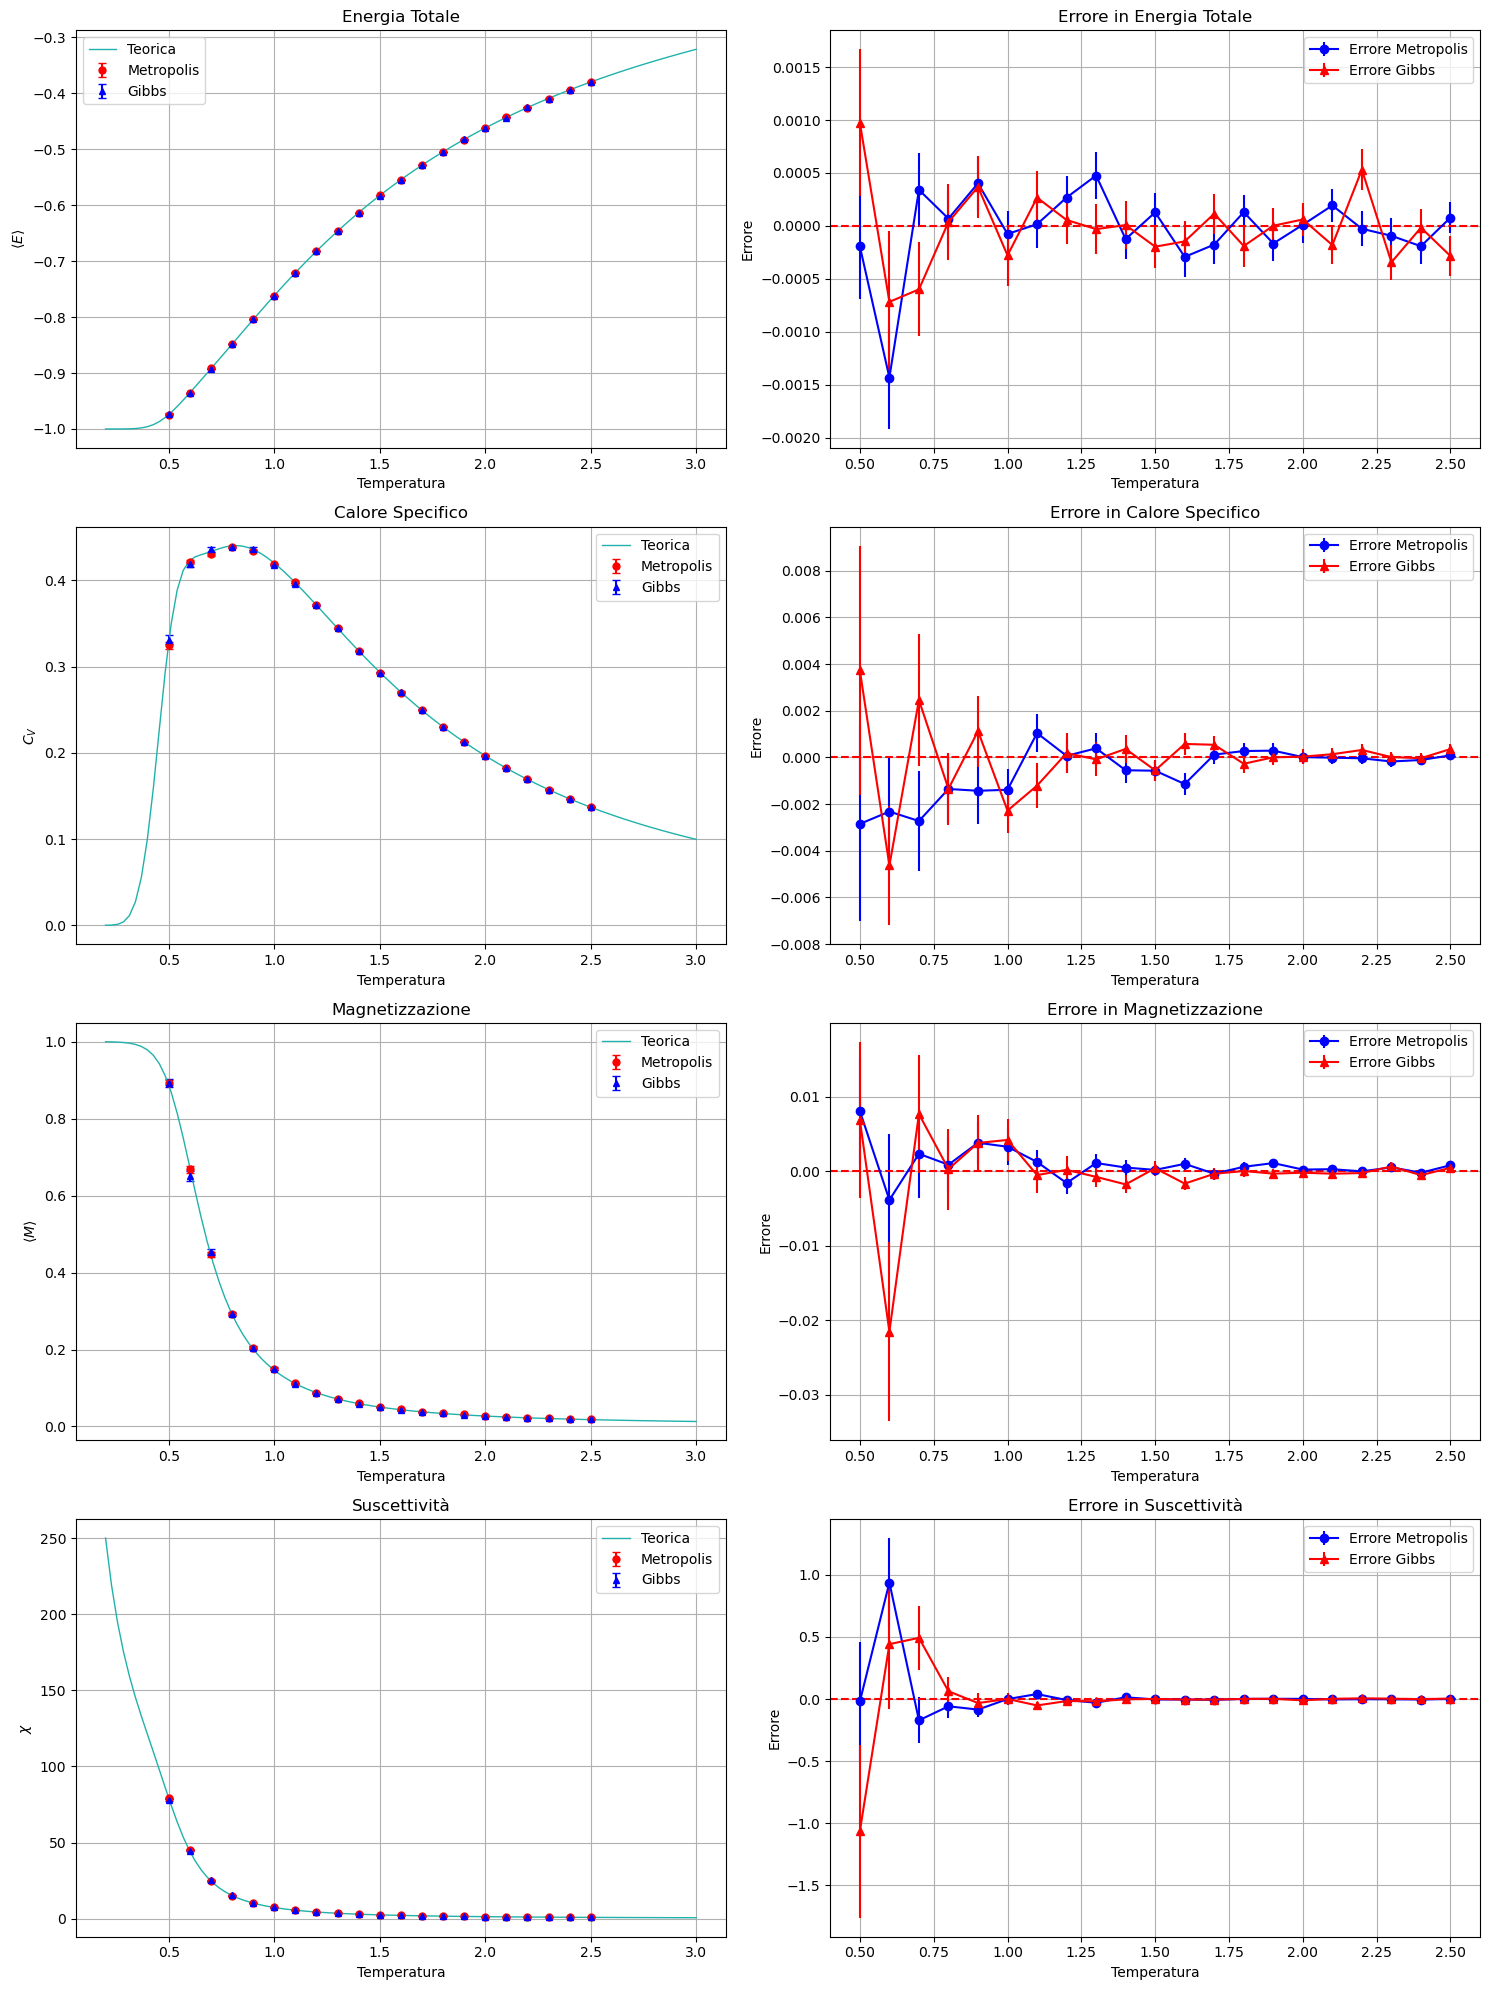

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parametri
points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1/T
J = 1.0
Ns = 50
h = 0.02

# Teorico
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th
energia_teorica = -J * (th + ch*thN) / (1 + thN)

calore_teorico = ((beta*J)**2) * (
    ((1 + thN + (Ns-1)*(th**2) + (Ns-1)*(ch**2)*thN)/(1 + thN)) -
    Ns*((th + ch*thN)/(1 + thN))**2
)

b = beta
l1 = np.exp(b*J)*np.cosh(b*h) + np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h) - np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
magnetizzazione_teorica = (np.exp(b*J)*np.sinh(b*h)*(
        (l1**(Ns-1))*(1 + np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J))) +
        (l2**(Ns-1))*(1 - np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2 - 2*np.sinh(2*b*J)))
    )) / Z

suscettivita_teorica = beta * np.exp(2*beta*J) * (1 - thN)/(1 + thN)

# Lettura dati
en_metro = pd.read_csv('OUTPUT/FINAL_METRO/total_energy.dat', delim_whitespace=True)
susc_metro = pd.read_csv('OUTPUT/FINAL_METRO/susceptibility.dat', delim_whitespace=True)
cv_metro = pd.read_csv('OUTPUT/FINAL_METRO/specific_heat.dat', delim_whitespace=True)
magn_metro = pd.read_csv('OUTPUT/FINAL_METRO/magnetization.dat', delim_whitespace=True)

en_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/total_energy.dat', delim_whitespace=True)
susc_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/susceptibility.dat', delim_whitespace=True)
cv_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/specific_heat.dat', delim_whitespace=True)
magn_gibbs = pd.read_csv('OUTPUT/FINAL_GIBBS/magnetization.dat', delim_whitespace=True)

# Plot
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Titoli e dati teorici
nomi = ['Energia Totale', 'Calore Specifico', 'Magnetizzazione', 'Suscettività']
ylabels = [r'$\langle E \rangle$', r'$C_V$', r'$\langle M \rangle$', r'$\chi$']
data_teorica = [energia_teorica, calore_teorico, magnetizzazione_teorica, suscettivita_teorica]
data_metro = [en_metro, cv_metro, magn_metro, susc_metro]
data_gibbs = [en_gibbs, cv_gibbs, magn_gibbs, susc_gibbs]
colonne = [['TE_AVE:', 'CV_AVE:', 'M_AVE:', 'X_AVE:'],
           ['ERROR:', 'ERROR:', 'ERROR:', 'ERROR:']]

# Colori
colori = ['blue', 'green', 'red', 'magenta']

for i in range(4):
    # Colonna sinistra: Dati + teoria
    axs[i, 0].errorbar(data_metro[i]['TEMPERATURE:'], data_metro[i][colonne[0][i]],
                       yerr=data_metro[i][colonne[1][i]], fmt='o', markersize=5,
                       capsize=3, color='red', label='Metropolis')
    
    axs[i, 0].errorbar(data_gibbs[i]['TEMPERATURE:'], data_gibbs[i][colonne[0][i]],
                       yerr=data_gibbs[i][colonne[1][i]], fmt='^', markersize=5,
                       capsize=3, color='blue', label='Gibbs')
    
    axs[i, 0].plot(T, data_teorica[i], color='lightseagreen', linewidth=1, label='Teorica')
    axs[i, 0].set_title(nomi[i])
    axs[i, 0].set_xlabel('Temperatura')
    axs[i, 0].set_ylabel(ylabels[i])
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Colonna destra: Errore rispetto al teorico
    axs[i, 1].errorbar(data_metro[i]['TEMPERATURE:'],
                       data_metro[i][colonne[0][i]] - np.interp(data_metro[i]['TEMPERATURE:'], T, data_teorica[i]),
                       yerr=data_metro[i][colonne[1][i]], fmt='-o', color='blue', label='Errore Metropolis')
    
    axs[i, 1].errorbar(data_gibbs[i]['TEMPERATURE:'],
                       data_gibbs[i][colonne[0][i]] - np.interp(data_gibbs[i]['TEMPERATURE:'], T, data_teorica[i]),
                       yerr=data_gibbs[i][colonne[1][i]], fmt='-^', color='r', label='Errore Gibbs')
    
    axs[i, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
    axs[i, 1].set_title(f'Errore in {nomi[i]}')
    axs[i, 1].set_xlabel('Temperatura')
    axs[i, 1].set_ylabel('Errore')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


Notiamo che per entrambi i metodi di campionamento vi è compatibilità statistica rispetto ai valori analitici. I maggiori scostamenti si verificano alle temperature più basse probabilmente per una maggiore difficoltà nell'esplorazione dello spazio delle configurazioni.